# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import chess
import chess.pgn
import os
import matplotlib.pyplot as plt
import seaborn as sns
from gi.overrides.keysyms import target

# Read FIle

In [4]:

PGN=open("../data/PGN/lichess_elite_2013-09.pgn","r")

In [5]:
PGN

<_io.TextIOWrapper name='../data/PGN/lichess_elite_2013-09.pgn' mode='r' encoding='UTF-8'>

In [8]:
chess.pgn.read_game(PGN)

<Game at 0x7edb21399750 ('Matetricks' vs. 'nicky', '????.??.??' at '?')>

In [9]:
first_game=chess.pgn.read_game(PGN)

In [10]:
first_game

<Game at 0x7edb2315e9b0 ('nicky' vs. 'Matetricks', '????.??.??' at '?')>

In [11]:
second_game=chess.pgn.read_game(PGN)

In [12]:
second_game

<Game at 0x7edb2312e170 ('nicky' vs. 'Matetricks', '????.??.??' at '?')>

In [13]:
third_game=chess.pgn.read_game(PGN)

In [14]:
third_game

<Game at 0x7edb2135a230 ('Matetricks' vs. 'nicky', '????.??.??' at '?')>

In [15]:
third_game.headers

Headers(Event='Rated Blitz game', Site='?', Date='????.??.??', Round='?', White='Matetricks', Black='nicky', Result='1-0', WhiteTitle='NM', WhiteElo='2484', BlackElo='2200', ECO='B01', Opening='Scandinavian Defense: Main Line', TimeControl='180+0', UTCDate='2013.09.25', UTCTime='00:48:37', Termination='Normal', WhiteRatingDiff='+6', BlackRatingDiff='-5')

In [16]:
third_game.headers["Termination"]

'Normal'

In [19]:
for header in third_game.headers:
    print(header)

Event
Site
Date
Round
White
Black
Result
WhiteTitle
WhiteElo
BlackElo
ECO
Opening
TimeControl
UTCDate
UTCTime
Termination
WhiteRatingDiff
BlackRatingDiff


# Game Headers

In [18]:
os.listdir("../data/PGN")

['lichess_elite_2013-09.pgn',
 'lichess_elite_2013-11.pgn',
 'lichess_elite_2014-01.pgn',
 'lichess_elite_2014-02.pgn',
 'lichess_elite_2014-03.pgn',
 'lichess_elite_2014-04.pgn',
 'lichess_elite_2014-05.pgn',
 'lichess_elite_2014-06.pgn',
 'lichess_elite_2014-07.pgn',
 'lichess_elite_2014-08.pgn',
 'lichess_elite_2014-09.pgn',
 'lichess_elite_2014-10.pgn',
 'lichess_elite_2014-11.pgn',
 'lichess_elite_2014-12.pgn',
 'lichess_elite_2015-01.pgn',
 'lichess_elite_2015-02.pgn',
 'lichess_elite_2015-03.pgn',
 'lichess_elite_2015-04.pgn',
 'lichess_elite_2015-05.pgn',
 'lichess_elite_2015-06.pgn',
 'lichess_elite_2015-07.pgn',
 'lichess_elite_2015-08.pgn',
 'lichess_elite_2015-09.pgn',
 'lichess_elite_2015-10.pgn',
 'lichess_elite_2015-11.pgn',
 'lichess_elite_2015-12.pgn',
 'lichess_elite_2016-01.pgn',
 'lichess_elite_2016-02.pgn',
 'lichess_elite_2016-03.pgn',
 'lichess_elite_2016-04.pgn',
 'lichess_elite_2016-05.pgn',
 'lichess_elite_2016-06.pgn',
 'lichess_elite_2016-07.pgn',
 'lichess_

In [7]:
def get_headers(pgn_path):
    Headers={}
    iteration_count=0
    with open(pgn_path,"r") as PGN:
        while True:
            game=chess.pgn.read_game(PGN)
            
            
            if game is None:
                break
            
            for header in game.headers:
                
                if header in Headers:
                    Headers[header].append(game.headers[header])
                
                elif header not in Headers and iteration_count:
                    Headers[header] = ([np.nan]*iteration_count)+[game.headers[header]]
                
                else:
                    Headers[header] = [game.headers[header]]
                    
            for header in Headers:
                if header not in game.headers:
                    Headers[header].append(np.nan)
            
            iteration_count+=1
    
    return pd.DataFrame(Headers)
                
        
        
    

In [8]:
get_headers("../data/PGN/lichess_elite_2013-09.pgn")

,Event,Site,Date,Round,White,Black,Result,WhiteTitle,WhiteElo,BlackElo,ECO,Opening,TimeControl,UTCDate,UTCTime,Termination,WhiteRatingDiff,BlackRatingDiff,BlackTitle
0,Rated Blitz game,?,????.??.??,?,Matetricks,nicky,1-0,NM,2471,2211,B01,Scandinavian Defense: Main Line,180+0,2013.09.25,00:38:04,Normal,+7,-6,NaN
1,Rated Blitz game,?,????.??.??,?,nicky,Matetricks,0-1,NaN,2217,2464,D01,Richter-Veresov Attack,180+0,2013.09.25,00:33:43,Normal,-6,+7,NM
2,Rated Blitz game,?,????.??.??,?,nicky,Matetricks,0-1,NaN,2205,2478,D01,"Queen's Pawn Game: Veresov Attack, Two Knights...",180+0,2013.09.25,00:43:09,Time forfeit,-5,+6,NM
3,Rated Blitz game,?,????.??.??,?,Matetricks,nicky,1-0,NM,2484,2200,B01,Scandinavian Defense: Main Line,180+0,2013.09.25,00:48:37,Normal,+6,-5,NaN
4,Rated Blitz game,?,????.??.??,?,geochess,Matetricks,0-1,NaN,2246,2490,A08,King's Indian Attack,180+0,2013.09.25,06:15:54,Normal,-5,+7,NM
5,Rated Blitz game,?,????.??.??,?,Matetricks,geochess,1-0,NM,2497,2241,B92,"Sicilian Defense: Najdorf Variation, Opocensky...",180+0,2013.09.25,06:20:54,Normal,+6,-5,NaN
6,Rated Blitz game,?,????.??.??,?,geochess,Matetricks,0-1,NaN,2236,2503,A08,King's Indian Attack,180+0,2013.09.25,06:25:35,Normal,-4,+6,NM
7,Rated Blitz game,?,????.??.??,?,Matetricks,geochess,1-0,NM,2509,2232,B84,"Sicilian Defense: Scheveningen Variation, Clas...",180+0,2013.09.25,06:31:04,Normal,+6,-4,NaN
8,Rated Blitz game,?,????.??.??,?,geochess,Matetricks,0-1,NaN,2228,2515,A08,King's Indian Attack,180+0,2013.09.25,06:34:48,Normal,-4,+6,NM
9,Rated Blitz game,?,????.??.??,?,Matetricks,geochess,1-0,NM,2521,2224,B84,"Sicilian Defense: Scheveningen Variation, Clas...",180+0,2013.09.25,06:40:44,Normal,+5,-4,NaN


In [12]:
def read_all_games_header(dir_path,save_path):
    pgn_files=os.listdir(dir_path)
    headers_df=None
    for num,pgn_file in enumerate(pgn_files):
        df=get_headers(os.path.join(dir_path,pgn_file))
        if headers_df is None:
            headers_df=df
            
        else:
            headers_df=pd.concat([headers_df,df])
        
        print(f"{num+1} of {len(pgn_files)}",f"Shape of DataFrame {headers_df.shape}")
    headers_df.to_csv(save_path,index=False)
    return headers_df
        

In [13]:
headers=read_all_games_header("../data/PGN","../data/unclean/header.csv")

1 of 79 Shape of DataFrame (10, 19)
2 of 79 Shape of DataFrame (14, 19)
3 of 79 Shape of DataFrame (17, 19)
4 of 79 Shape of DataFrame (40, 19)
5 of 79 Shape of DataFrame (45, 19)
6 of 79 Shape of DataFrame (52, 19)
7 of 79 Shape of DataFrame (316, 19)
8 of 79 Shape of DataFrame (456, 19)
9 of 79 Shape of DataFrame (548, 19)
10 of 79 Shape of DataFrame (686, 19)
11 of 79 Shape of DataFrame (893, 19)
12 of 79 Shape of DataFrame (1341, 19)
13 of 79 Shape of DataFrame (1579, 19)
14 of 79 Shape of DataFrame (2118, 19)
15 of 79 Shape of DataFrame (2582, 19)
16 of 79 Shape of DataFrame (3356, 19)
17 of 79 Shape of DataFrame (4097, 20)
18 of 79 Shape of DataFrame (4677, 20)
19 of 79 Shape of DataFrame (5316, 20)
20 of 79 Shape of DataFrame (5667, 20)
21 of 79 Shape of DataFrame (6145, 20)
22 of 79 Shape of DataFrame (7014, 20)
23 of 79 Shape of DataFrame (8764, 20)
24 of 79 Shape of DataFrame (10327, 20)
25 of 79 Shape of DataFrame (13781, 20)
26 of 79 Shape of DataFrame (19330, 20)
27 of 79 

In [28]:
headers.shape

(3819130, 20)

In [14]:
headers

,Event,Site,Date,Round,White,Black,Result,WhiteTitle,WhiteElo,BlackElo,ECO,Opening,TimeControl,UTCDate,UTCTime,Termination,WhiteRatingDiff,BlackRatingDiff,BlackTitle,LichessId
0,Rated Blitz game,?,????.??.??,?,Matetricks,nicky,1-0,NM,2471,2211,B01,Scandinavian Defense: Main Line,180+0,2013.09.25,00:38:04,Normal,+7,-6,NaN,NaN
1,Rated Blitz game,?,????.??.??,?,nicky,Matetricks,0-1,NaN,2217,2464,D01,Richter-Veresov Attack,180+0,2013.09.25,00:33:43,Normal,-6,+7,NM,NaN
2,Rated Blitz game,?,????.??.??,?,nicky,Matetricks,0-1,NaN,2205,2478,D01,"Queen's Pawn Game: Veresov Attack, Two Knights...",180+0,2013.09.25,00:43:09,Time forfeit,-5,+6,NM,NaN
3,Rated Blitz game,?,????.??.??,?,Matetricks,nicky,1-0,NM,2484,2200,B01,Scandinavian Defense: Main Line,180+0,2013.09.25,00:48:37,Normal,+6,-5,NaN,NaN
4,Rated Blitz game,?,????.??.??,?,geochess,Matetricks,0-1,NaN,2246,2490,A08,King's Indian Attack,180+0,2013.09.25,06:15:54,Normal,-5,+7,NM,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369767,Rated Blitz game,?,2020.05.31,-,luiso1961,Donnerhall,1/2-1/2,FM,2372,2543,D85,Grünfeld Defense: Exchange Variation,180+0,2020.05.31,23:59:30,Normal,+2,-2,NaN,NaN
369768,Rated Blitz game,?,2020.05.31,-,Ryan-Rhys,Phutressniak,1-0,FM,2468,2426,E46,Nimzo-Indian Defense: Reshevsky Variation,180+0,2020.05.31,23:59:35,Time forfeit,+5,-5,LM,NaN
369769,Rated Blitz game,?,2020.05.31,-,MagicDreams93,zsolti_83,0-1,NaN,2373,2486,E46,Nimzo-Indian Defense: Reshevsky Variation,180+2,2020.05.31,23:59:41,Normal,-4,+4,NaN,NaN
369770,Rated Blitz game,?,2020.05.31,-,Chessbard1972,guicar16,0-1,NaN,2345,2489,C50,Italian Game: Hungarian Defense,180+2,2020.05.31,23:59:49,Normal,-3,+4,CM,NaN


In [15]:
headers.columns

Index(['Event', 'Site', 'Date', 'Round', 'White', 'Black', 'Result',
       'WhiteTitle', 'WhiteElo', 'BlackElo', 'ECO', 'Opening', 'TimeControl',
       'UTCDate', 'UTCTime', 'Termination', 'WhiteRatingDiff',
       'BlackRatingDiff', 'BlackTitle', 'LichessId'],
      dtype='object')

### 1. Event

In [16]:
headers["Event"].nunique()

3

In [17]:
headers["Event"].value_counts()

Event
Rated Blitz game        3774133
Rated Rapid game          24152
Rated Classical game      20845
Name: count, dtype: int64

In [19]:
headers["Event"].isnull().sum()

0

<Axes: xlabel='Event', ylabel='count'>

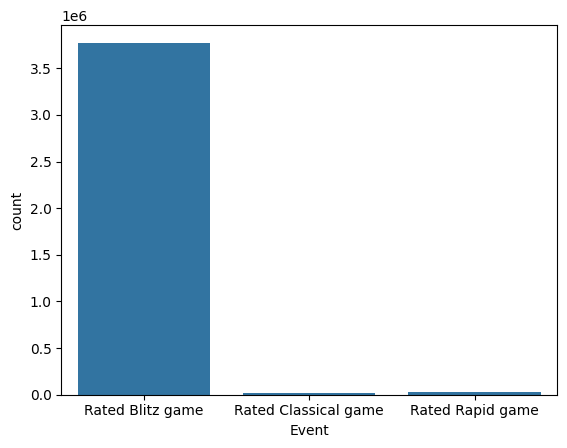

In [22]:
sns.countplot(x="Event",data=headers)

### 2. Site

In [24]:
headers.Site.nunique()

1

In [27]:
headers.Site.unique()

array(['?'], dtype=object)

### 3. Date

In [30]:
headers.Date.value_counts()

Date
????.??.??    665521
2020.04.04     15667
2020.04.05     15523
2020.04.03     15482
2020.04.02     15408
               ...  
2018.05.18       867
2018.04.22       862
2018.04.08       846
2018.07.07       776
2018.03.31        73
Name: count, Length: 794, dtype: int64

In [32]:
year=headers.Date.str.split(".",n=1).str.get(0)

In [33]:
year.value_counts()

Date
2020    1654491
2019    1153587
????     665521
2018     345531
Name: count, dtype: int64

In [35]:
year[year=="????"]="2013-2017"

In [37]:
year.value_counts()

Date
2020         1654491
2019         1153587
2013-2017     665521
2018          345531
Name: count, dtype: int64

<BarContainer object of 4 artists>

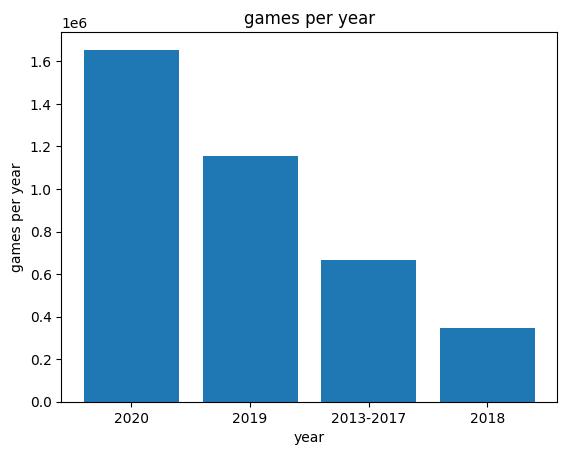

In [39]:
plt.title("games per year")
plt.xlabel("year")
plt.ylabel("games per year")
plt.bar(year.value_counts().index,year.value_counts().values)

<BarContainer object of 10 artists>

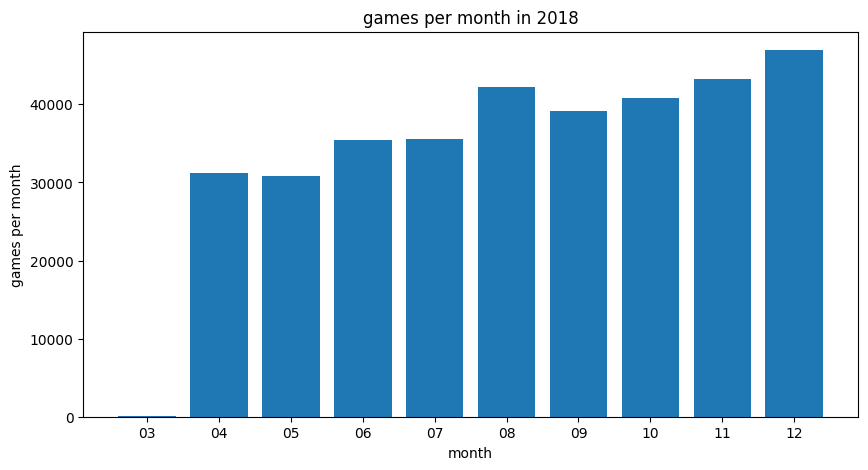

In [51]:
temp=headers.Date[headers.Date.str.split(".",n=1).str.get(0)=="2018"].str.split(".",n=3).str.get(1)
temp=temp.value_counts().to_frame().reset_index().sort_values(by=['Date'])
plt.figure(figsize=(10,5))
plt.title("games per month in 2018")
plt.xlabel("month")
plt.ylabel("games per month")
plt.bar(temp["Date"],temp["count"])

<BarContainer object of 12 artists>

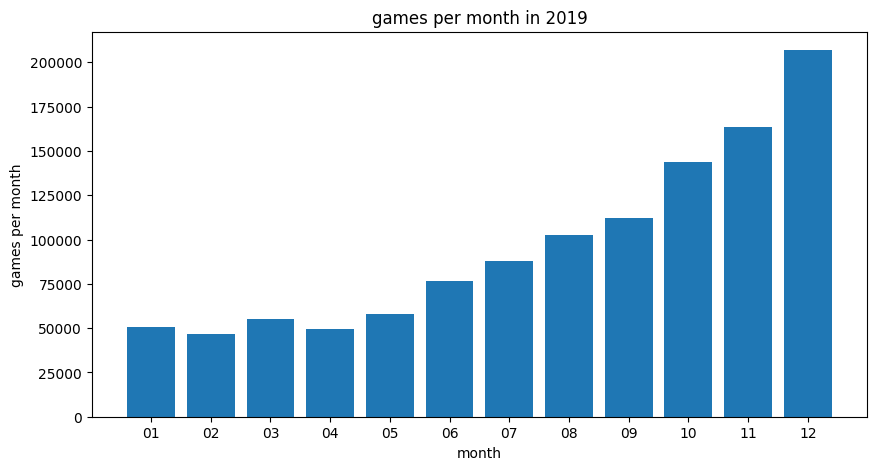

In [52]:
temp=headers.Date[headers.Date.str.split(".",n=1).str.get(0)=="2019"].str.split(".",n=3).str.get(1)
temp=temp.value_counts().to_frame().reset_index().sort_values(by=['Date'])
plt.figure(figsize=(10,5))
plt.title("games per month in 2019")
plt.xlabel("month")
plt.ylabel("games per month")
plt.bar(temp["Date"],temp["count"])

<BarContainer object of 5 artists>

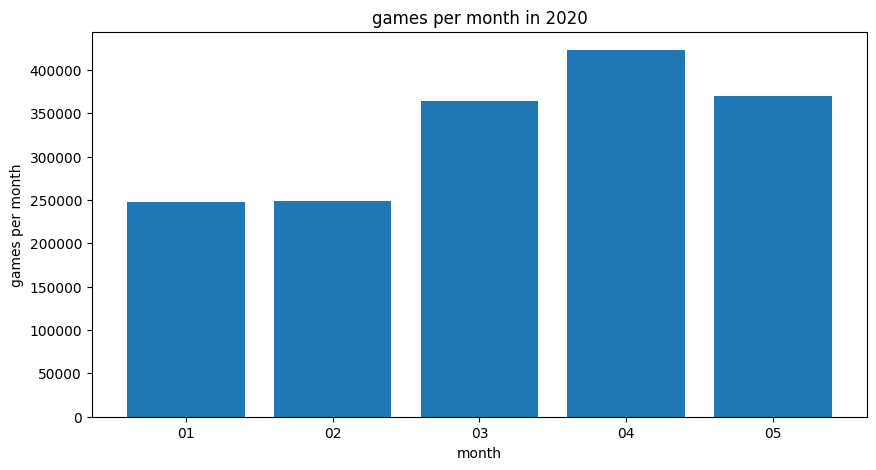

In [53]:
temp=headers.Date[headers.Date.str.split(".",n=1).str.get(0)=="2020"].str.split(".",n=3).str.get(1)
temp=temp.value_counts().to_frame().reset_index().sort_values(by=['Date'])
plt.figure(figsize=(10,5))
plt.title("games per month in 2020")
plt.xlabel("month")
plt.ylabel("games per month")
plt.bar(temp["Date"],temp["count"])

- **In dataset, the number of games has gradually been increased with each next month**

### 4. Round

In [56]:
headers.Round.unique()

array(['?', '-'], dtype=object)

### 5. Result

In [63]:
headers.Result.unique()

array(['1-0', '0-1', '1/2-1/2', '*'], dtype=object)

In [64]:
headers.Result.value_counts()

Result
1-0        1835842
0-1        1666151
1/2-1/2     315977
*             1160
Name: count, dtype: int64

<Axes: xlabel='Result', ylabel='count'>

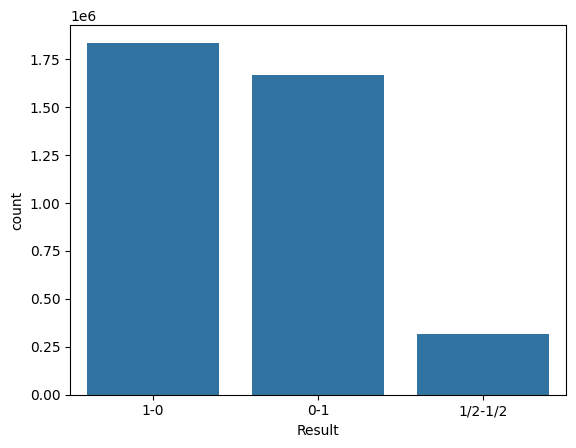

In [65]:
sns.countplot(data=headers[headers.Result!="*"],x="Result")

### 6. Opening

In [68]:
opening=headers.Opening.value_counts().to_frame().reset_index()

In [69]:
opening

,Opening,count
0,Indian Game,52658
1,Modern Defense,39682
2,Trompowsky Attack,37842
3,Sicilian Defense: Najdorf Variation,27917
4,Sicilian Defense: Closed Variation,27858
...,...,...
3216,Amar Opening: Gent Gambit,1
3217,"King's Indian, Saemisch, Ruban Variation",1
3218,Nimzowitsch Defense: Franco-Hiva Gambit #2,1
3219,Kadas Opening: Myers Variation,1


<BarContainer object of 50 artists>

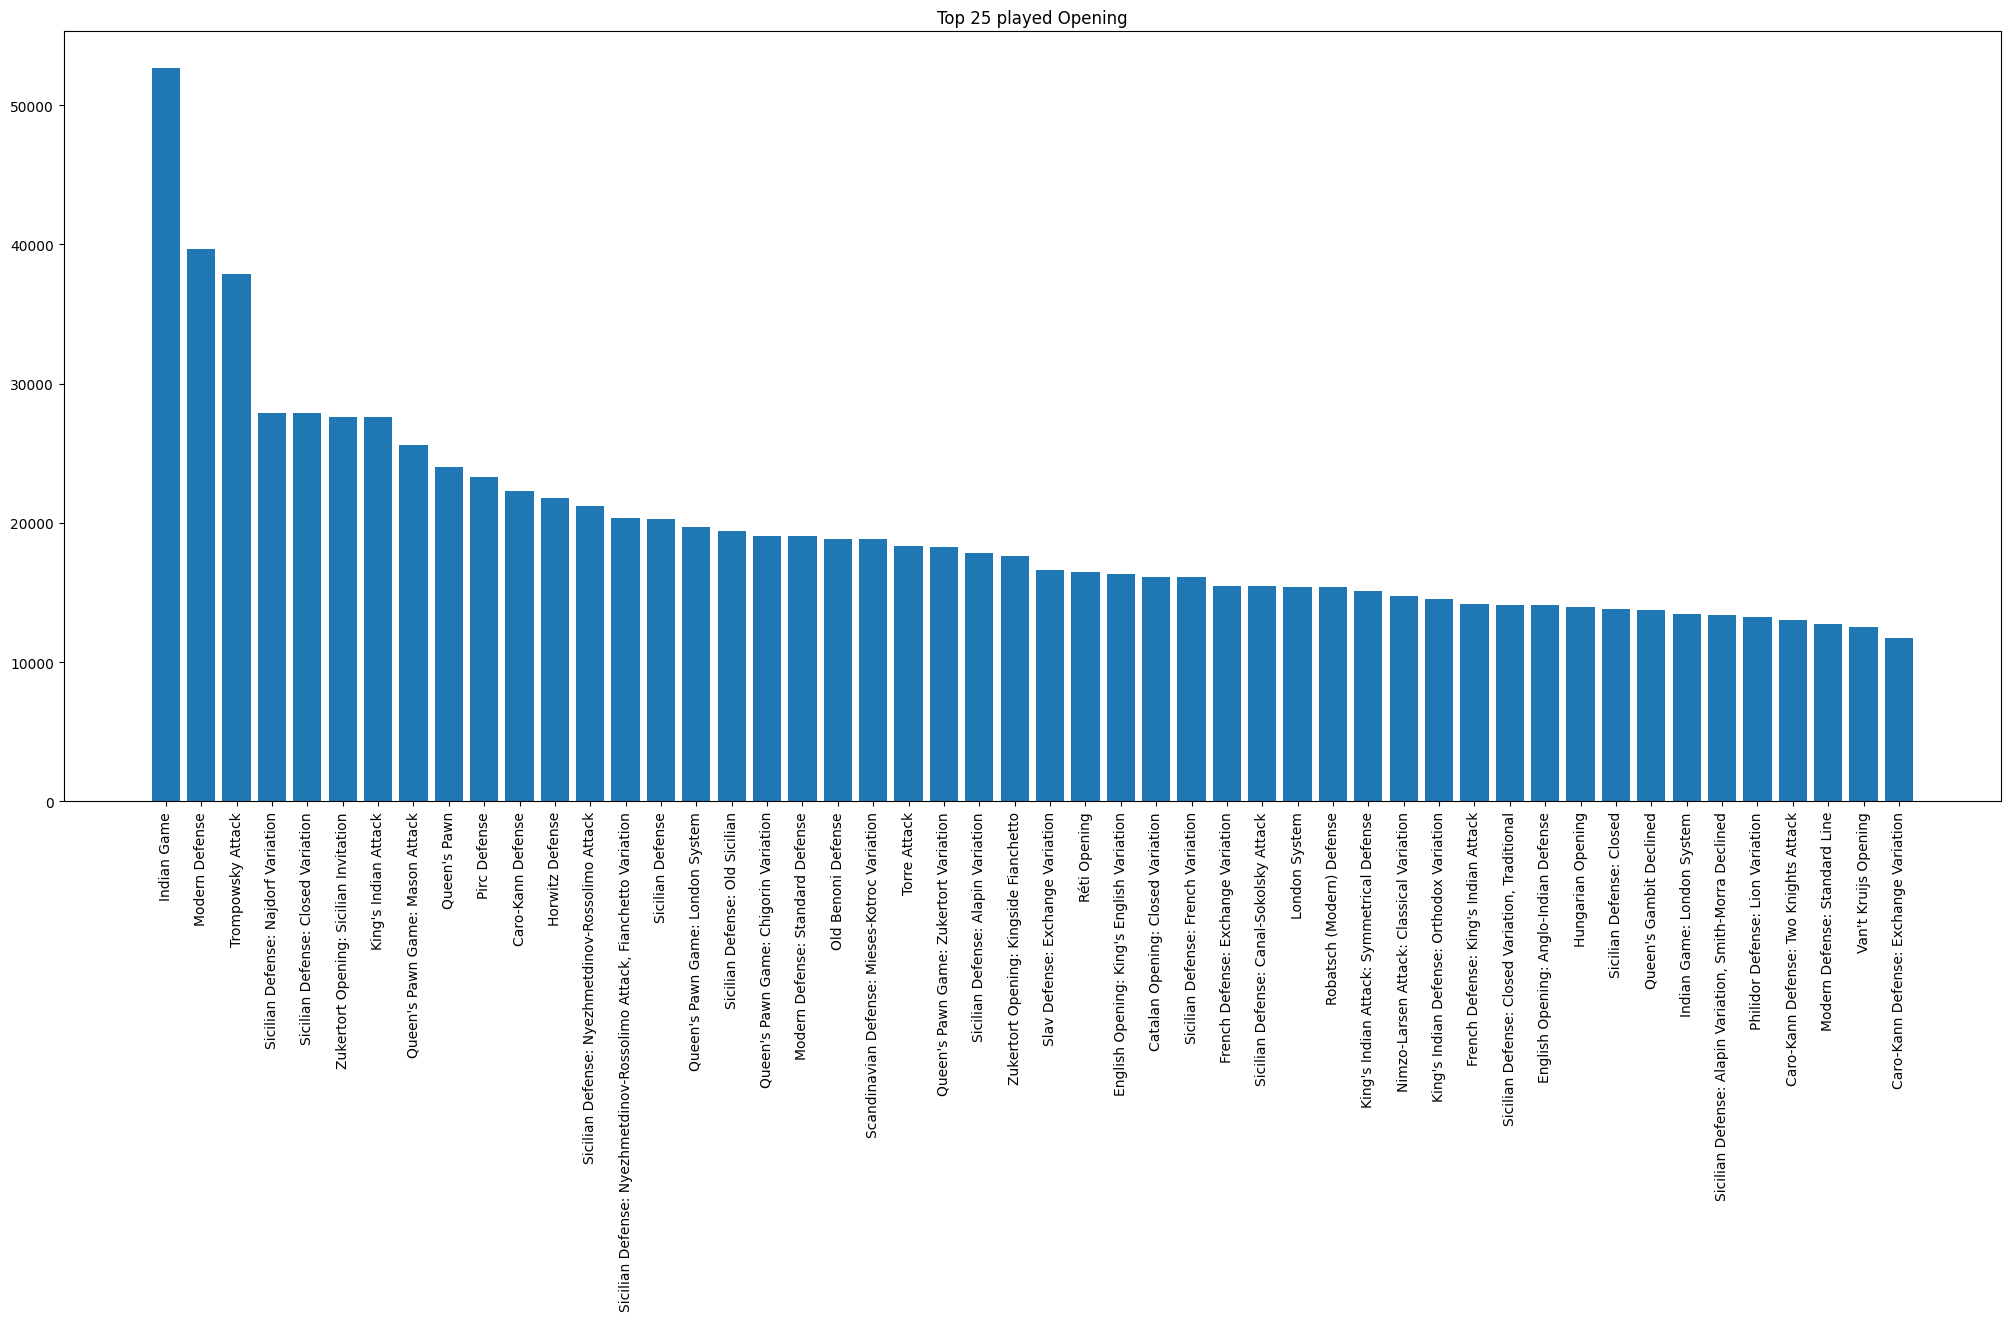

In [77]:
plt.figure(figsize=(25,10))
plt.title("Top 25 played Opening")
plt.xticks(rotation=90)
plt.bar(x=opening["Opening"][:50],height=opening["count"][:50])


### 7. Termination

In [78]:
headers.Termination.value_counts()

Termination
Normal              2896673
Time forfeit         921226
Abandoned              1160
Rules infraction         71
Name: count, dtype: int64

# Game Encoding

In [2]:
def bitmap_encoding(board):
    """ Convert a chess.Board to a NumPy array with piece representations. """
    numpy_board = np.zeros(shape=(8,8))#np.full((8, 8), 0, dtype=object)  # Start with an empty board filled with 0

    for square, piece in board.piece_map().items():
        row, col = divmod(square, 8)
        piece_symbol = 1 if piece.symbol()==piece.symbol().lower() else -1  # fill pieces position with 1 and -1
        numpy_board[row][col] = piece_symbol

    return numpy_board.reshape(-1) 




In [3]:
def get_game_matrix(game,num_moves=50):
    numpy_game= np.zeros(shape=(num_moves,64))  #np.full((num_moves,8, 8), 0, dtype=object)
    
    board=game.board()
    
    numpy_game[0]=bitmap_encoding(board)
    
    for num, move in enumerate( game.mainline_moves()):
        if num+1==num_moves:
            break
        board.push(move)
        numpy_game[num+1]=bitmap_encoding(board)
        
     
    return numpy_game 
        
        
        
        
    
    
    

In [75]:
def encoded_all_game(dir_path,save_path,memmap_shape=(300000,64,64)):
    pgn_files=os.listdir(dir_path)
    games_tensor=np.memmap(save_path,dtype='float64',mode='w+',shape=memmap_shape)
    current_index=0
    target=np.zeros(memmap_shape[0])
    
    for num,pgn_file in enumerate(pgn_files):
        with open(os.path.join(dir_path,pgn_file)) as PGN_file:
            
            while True:
                game=chess.pgn.read_game(PGN_file)
                

                if game is None:
                    break
                    
                    
                if game.headers["Termination"] in ['Abandoned','Rules infraction']:
                    continue
                
                result=str(game.headers["Result"])
                if result=='0-1':
                    target[current_index]=0
                
                elif result=='1-0':
                    target[current_index]=1
                
                else:
                    target[current_index]=2
                  
                
                games_tensor[current_index]=get_game_matrix(game,num_moves=memmap_shape[1])
                

                current_index+=1
                
                
                if not current_index%100000:
                    print(f"{current_index}/{memmap_shape[0]} is done")
                    
                    
                if current_index>=memmap_shape[0]:
                    break
            
        if current_index>=memmap_shape[0]:
            break
    
    games_tensor.flush()
    np.save("../data/cleaned/target.npy",target)
            

In [76]:
encoded_all_game("../data/PGN","../data/cleaned/games_tensor.dat")

100000/300000 is done
200000/300000 is done
300000/300000 is done


In [67]:
games_tensor[0][0]

memmap([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
        -1., -1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [48]:
pgn = open("../data/PGN/lichess_elite_2013-09.pgn","r")
game=chess.pgn.read_game(pgn)
get_game_matrix(game)


array([[-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       [-1., -1., -1., ...,  1.,  1.,  1.],
       ...,
       [-1.,  0.,  0., ...,  0.,  0.,  1.],
       [-1.,  0.,  0., ...,  1.,  0.,  1.],
       [-1.,  0.,  0., ...,  1.,  0.,  1.]])

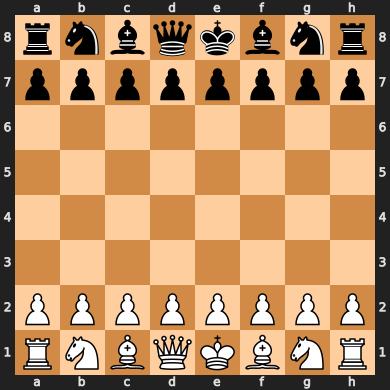

In [49]:
game.board()

In [51]:
headers=pd.read_csv("../data/unclean/header.csv",low_memory=False)

In [52]:
headers["Termination"].unique()

array(['Normal', 'Time forfeit', 'Abandoned', 'Rules infraction'],
      dtype=object)

In [56]:
headers.query("~Termination.isin(['Abandoned','Rules infraction'])").shape

(3817899, 20)

# Train, Valid & Test

In [66]:
np.random.seed(42)

In [77]:
games_tensor=np.memmap("../data/cleaned/games_tensor.dat",dtype='float64',mode='r',shape=(300000,64,64))

In [78]:
games_tensor.shape

(300000, 64, 64)

In [30]:
target=np.load("../data/cleaned/target.npy")

In [31]:
target.shape

(300000,)

In [67]:
indexes=np.arange(300000)

In [68]:
np.random.shuffle(indexes)

In [69]:
indexes

array([  4941,  51775, 115253, ..., 131932, 146867, 121958])

In [83]:
def split_data(random_seed=42):
    np.random.seed(random_seed)
    games_tensor=np.memmap("../data/cleaned/games_tensor.dat",dtype='float64',mode='r',shape=(300000,64,64))
    target=np.load("../data/cleaned/target.npy")
    
    indexes=np.arange(games_tensor.shape[0])
    np.random.shuffle(indexes)
    
    train_index= indexes[:int(games_tensor.shape[0]*0.8)]
    temp_indexes=indexes[int(games_tensor.shape[0]*0.8):]
    val_index=temp_indexes[:temp_indexes.shape[0]//2]
    test_index=temp_indexes[temp_indexes.shape[0]//2:]
    
    train_games_tensor=np.memmap("../data/cleaned/train_games_tensor.dat",dtype='float64',mode='w+',shape=(train_index.shape[0],64,64))
    train_target=np.zeros(shape=(train_index.shape[0]))
    
    for index in range(train_games_tensor.shape[0]):
        train_games_tensor[index]= games_tensor[ train_index[index] ]
        train_target[index] = target[ train_index[index] ]
    
    train_games_tensor.flush()
    np.save("../data/cleaned/train_target.npy",train_target)
    
    
    val_games_tensor=np.memmap("../data/cleaned/val_games_tensor.dat",dtype='float64',mode='w+',shape=(val_index.shape[0],64,64))
    val_target=np.zeros(shape=(val_index.shape[0]))
    
    for index in range(val_games_tensor.shape[0]):
        val_games_tensor[index]= games_tensor[ val_index[index] ]
        val_target[index] = target[ val_index[index] ]
    
    train_games_tensor.flush()
    np.save("../data/cleaned/val_target.npy",val_target)
    
    
    test_games_tensor=np.memmap("../data/cleaned/test_games_tensor.dat",dtype='float64',mode='w+',shape=(test_index.shape[0],64,64))
    test_target=np.zeros(shape=(test_index.shape[0]))
    
    for index in range(val_games_tensor.shape[0]):
        test_games_tensor[index]= games_tensor[ test_index[index] ]
        test_target[index] = target[ test_index[index] ]
    
    train_games_tensor.flush()
    np.save("../data/cleaned/test_target.npy",val_target)   
    
    with open("../data/cleaned/dataset_info.txt","w") as f:
        text=f"train shape {(train_index.shape[0],64,64)}"
        text+=f"\n val shape {(val_index.shape[0],64,64)}"
        text+=f"\n test shape {(test_index.shape[0],64,64)}"
        
        f.write(text)
        print(text)
    
    
    
    
    
    

In [84]:
split_data()

train shape (240000, 64, 64)
 val shape (30000, 64, 64)
 test shape (30000, 64, 64)


In [81]:
train_games_tensor=np.memmap("../data/cleaned/train_games_tensor.dat",dtype='float64',mode='r',shape=(30000*8,64,64))

In [82]:
train_games_tensor[0]

memmap([[-1., -1., -1., ...,  1.,  1.,  1.],
        [-1., -1., -1., ...,  1.,  1.,  1.],
        [-1., -1., -1., ...,  1.,  0.,  1.],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [-1.,  0.,  0., ...,  0.,  0.,  0.]])